In [13]:
import tensorflow as tf
import numpy as np
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
import sys
from tensorflow.examples.tutorials.mnist import input_data
FLAGS = None

In [1]:
import gym
env = gym.make("Pong-v0")

[2017-08-30 11:06:21,180] Making new env: Pong-v0


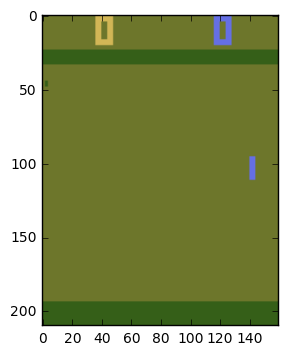

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

render = lambda : plt.imshow(env.render(mode='rgb_array'))
env.reset()
render()


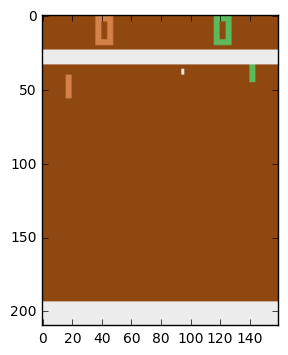

In [69]:
env.step(4)
render()

In [66]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
np.random.seed(1)

x_data = np.random.rand(1).astype("float32")
y_data = (x_data < 0.5).astype("float32")

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0, seed=1))
b = tf.Variable(tf.zeros([1]))
logits = W * x_data + b


solo_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
                        labels=y_data, logits=logits)
cross_entropy = tf.reduce_mean(solo_cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(cross_entropy)

sess = tf.InteractiveSession(config=config)
tf.global_variables_initializer().run()

# Fit the line.
for step in range(10):
    print (step, sess.run(W), sess.run(b), sess.run(cross_entropy),
                   sess.run(logits))
    sess.run(train)


0 [-0.88891172] [ 0.] 0.0 [-0.37069574]
1 [-0.88891172] [ 0.] 0.0 [-0.37069574]
2 [-0.88891172] [ 0.] 0.0 [-0.37069574]
3 [-0.88891172] [ 0.] 0.0 [-0.37069574]
4 [-0.88891172] [ 0.] 0.0 [-0.37069574]
5 [-0.88891172] [ 0.] 0.0 [-0.37069574]
6 [-0.88891172] [ 0.] 0.0 [-0.37069574]
7 [-0.88891172] [ 0.] 0.0 [-0.37069574]
8 [-0.88891172] [ 0.] 0.0 [-0.37069574]
9 [-0.88891172] [ 0.] 0.0 [-0.37069574]


In [75]:
sess.run(tf.nn.softmax([-1.]))

array([ 1.], dtype=float32)